# Практика

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
import statsmodels.stats.weightstats as ssw
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [3]:
# ваш код тут
# например вот такое распределение https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cosine.html#scipy.stats.cosine
expone_rv = sts.expon()
sample = expone_rv.rvs(100)
sample

array([9.59558385e-01, 5.37732131e-01, 2.20184637e-01, 3.73516182e-01,
       4.08978891e-01, 1.54227229e+00, 1.28708440e+00, 1.23996623e+00,
       3.75092675e-01, 2.89127307e+00, 1.13740557e+00, 1.29286959e+00,
       6.17745491e-01, 2.06531531e+00, 3.31503870e-01, 1.85958731e+00,
       1.04555318e+00, 1.49641315e-01, 2.84572540e-01, 2.52514137e+00,
       1.49389291e+00, 2.37680901e+00, 4.65499101e-01, 1.55170905e-01,
       2.11688464e+00, 7.44368421e-01, 3.61456919e-02, 1.13585907e-01,
       3.64053876e+00, 1.14408190e+00, 2.22412507e-01, 8.01674357e-01,
       1.96333161e+00, 2.29409273e-03, 7.30165095e-01, 2.23574250e+00,
       4.17192459e-01, 4.86123591e-03, 7.20498035e-01, 4.97347984e-01,
       5.18184822e-02, 9.96094778e-01, 1.44564852e+00, 1.39906892e+00,
       5.04438371e-01, 1.80281992e+00, 2.82513078e-01, 2.85576009e+00,
       1.53191820e+00, 1.55340825e-01, 2.95687523e-01, 8.51369504e-03,
       1.29294424e+00, 6.31578010e-01, 3.78401754e-01, 1.19359079e+00,
      

In [4]:
sample.dtype

dtype('float64')

(array([34., 17., 15., 13.,  6.,  4.,  2.,  4.,  2.,  3.]),
 array([2.29409273e-03, 3.98987725e-01, 7.95681357e-01, 1.19237499e+00,
        1.58906862e+00, 1.98576225e+00, 2.38245589e+00, 2.77914952e+00,
        3.17584315e+00, 3.57253678e+00, 3.96923042e+00]),
 <a list of 10 Patch objects>)

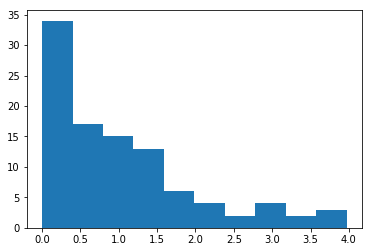

In [5]:
plt.hist(sample)

In [6]:
real_mean = expone_rv.mean() # настоящее среднее случайной величины
real_mean

1.0

In [7]:
real_var = expone_rv.var() # настоящая дисперсия случайной величины
real_var

1.0

### Постройте гистограмму выборки и теоретическую плотность распределения

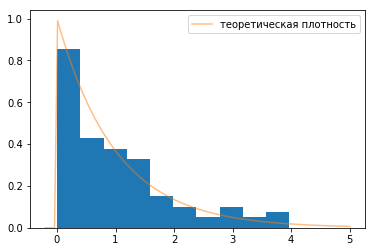

In [8]:
# ваш код тут
plt.hist(sample, density=True)
x = np.linspace(-0.2, 5,100)
pdf = expone_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [9]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

1.0314796348196422
0.9459468552485276


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

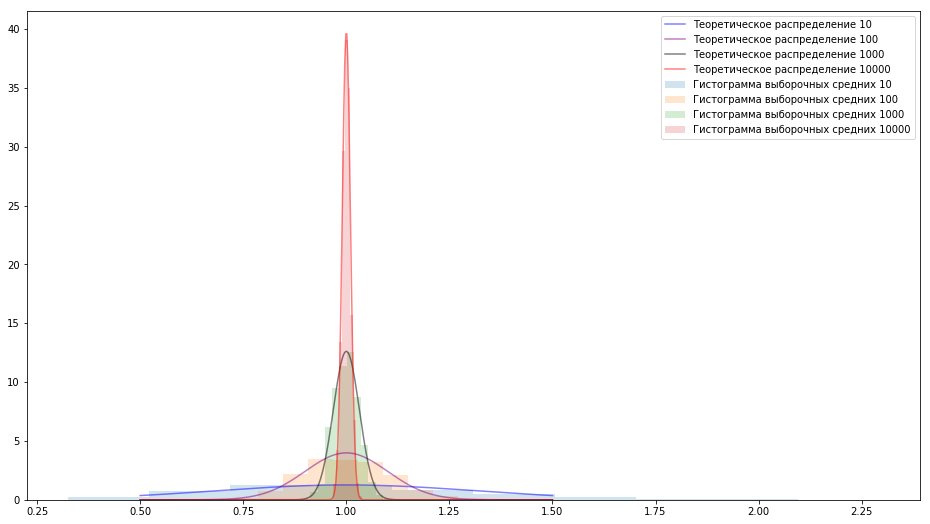

In [11]:
# ваш код тут
plt.figure(figsize=(16,9))
colors = ["blue", "purple", "black", "red"]
theor_legend = 'Теоретическое распределение {}'
hist_legend = 'Гистограмма выборочных средних {}'

# сгенерируем много выборочных средних
for i, N in enumerate([10, 100, 1000, 10000]):
    means = []
    for _ in range(1000):
         means.append(np.mean(expone_rv.rvs(N)))
            
    plt.hist(means, density=True, alpha=0.2)
    
    norm_rv = sts.norm(loc=expone_rv.mean(), scale=expone_rv.std() / np.sqrt(N))

    x = np.linspace(0.5, 1.5, 410)
    pdf = norm_rv.pdf(x)
    
    plt.plot(x, pdf, alpha=0.5, color=colors[i])
    plt.plot()

plt.legend(
    [
        theor_legend.format(10), 
        theor_legend.format(100), 
        theor_legend.format(1000), 
        theor_legend.format(10000), 
        hist_legend.format(10), 
        hist_legend.format(100),
        hist_legend.format(1000),
        hist_legend.format(10000)
    ]
)

plt.show()  

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?

**Ваш ответ:**

Для выбранного распределения апроксимация распределения выборочного среднего работает хорошо, тк распределение выборочных средних стремится к нормальному распределению, в особенности на больших выборках, что хорошо видно на графике.

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [14]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df=pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [99]:
target_df = df[['total day calls', 'churn']]
target_df.head()

,total day calls,churn
0,110,False
1,123,False
2,114,False
3,71,False
4,113,False


In [100]:
stat = target_df.groupby('churn')['total day calls'].agg(
    [
        ('c_mean', 'mean'), 
        ('c_std', lambda x: x.std(ddof=1)),
        ('n_count', 'count')
    ]
)

assert(stat.loc[False].n_count + stat.loc[True].n_count == target_df.shape[0])

stat

,c_mean,c_std,n_count
churn,,,
False,100.283158,19.801157,2850
True,101.335404,21.582307,483


In [101]:
def calculate_interval_formula(mean, std, n_count):
    interval = mean - 1.96 * std / np.sqrt(n_count - 1), mean + 1.96 * std / np.sqrt(n_count-1)
    print(
        "Доверительный интервал для среднего по цпт, если нам известна дисперсия: {} ".format(interval)
    )
    
    return interval
    
def calculate_interval_zconfit(mean, std):
    interval = ssw._zconfint_generic(mean,  std, alpha=0.95, alternative='two-sided')
    print(
        "Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(interval)
    )
    return interval

In [102]:
print('Доверительный интервал churn - False')
f_false_interval = calculate_interval_formula(stat.loc[False].c_mean, stat.loc[False].c_std, stat.loc[False].n_count)
print('Доверительный интервал churn - True')
f_true_interval = calculate_interval_formula(stat.loc[True].c_mean, stat.loc[True].c_std, stat.loc[True].n_count)

Доверительный интервал churn - False
Доверительный интервал для среднего по цпт, если нам известна дисперсия: (99.55604740026511, 101.01026838920858) 
Доверительный интервал churn - True
Доверительный интервал для среднего по цпт, если нам известна дисперсия: (99.40863130099713, 103.26217615241903) 


In [103]:
print('Доверительный интервал churn - False')
zc_false_interval = calculate_interval_zconfit(stat.loc[False].c_mean, stat.loc[False].c_std)
print('Доверительный интервал churn - True')
zc_interval = calculate_interval_zconfit(stat.loc[True].c_mean, stat.loc[True].c_std)

Доверительный интервал churn - False
Доверительный интервал для среднего по цпт методом _zconfint_generic: (99.04149114274125, 101.52482464673244) 
Доверительный интервал churn - True
Доверительный интервал для среднего по цпт методом _zconfint_generic: (99.98204678079553, 102.68876067262063) 


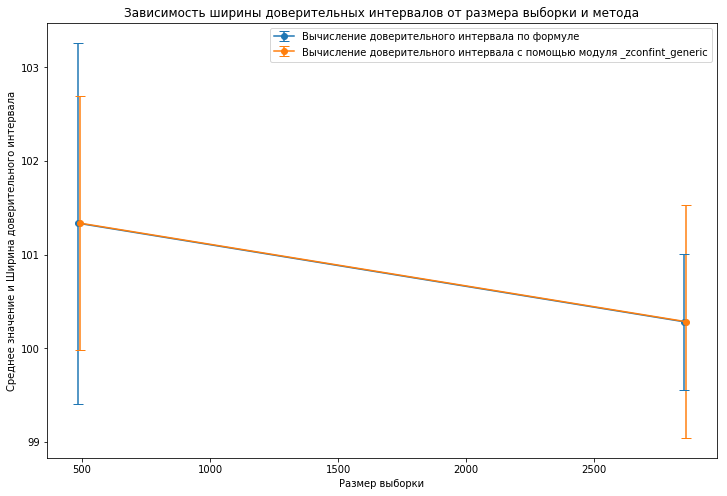

In [106]:
group_sizes = [stat.loc[True].n_count, stat.loc[False].n_count]

plt.figure(figsize=(12, 8))

f_false_int_width = f_false_interval[1] - f_false_interval[0]
f_true_int_width = f_true_interval[1] - f_true_interval[0]

plt.errorbar(
    np.array(group_sizes), 
    [stat.loc[True].c_mean, stat.loc[False].c_mean], 
    yerr=[f_true_int_width / 2, f_false_int_width / 2],  
    fmt='o-', 
    label='Вычисление доверительного интервала по формуле', 
    capsize=5
)


false_int_width = zc_false_interval[1] - zc_false_interval[0]
true_int_width = zc_true_interval[1] - zc_true_interval[0]

plt.errorbar(
    np.array(group_sizes) + 10, 
    [stat.loc[True].c_mean, stat.loc[False].c_mean], 
    yerr=[true_int_width / 2, false_int_width / 2], 
    fmt='o-', 
    label='Вычисление доверительного интервала с помощью модуля _zconfint_generic', 
    capsize=5
)

plt.title('Зависимость ширины доверительных интервалов от размера выборки и метода')
plt.xlabel('Размер выборки')
plt.ylabel('Среднее значение и Ширина доверительного интервала')
plt.legend()
plt.show()


Из анализа интервальной оценки следует вывод, что интервал, вычисленный по формуле, на большей выборке точнее, чем вычисленный с помощью `_zconfint_generic`. Соответственно, на меньшей выборке более точный интервал показывает `_zconfint_generic`